# Project 01: Student Exam Performance


The following high school student performance dataset has been collected from <a href="https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics/data">Kaggle</a> and it contains student achievement data for two Portuguese high schools.

Attributes for both student_math_cleaned.csv (Math course) and student_portuguese_cleaned.csv (Portuguese language course) datasets:

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address_type - student's home address type (binary: "Urban" or "Rural")
5. family_size - family size (binary: "Less or equal to 3" or "Greater than 3")
6. parent_status - parent's cohabitation status (binary: "Living together" or "Apart")
7. mother_education - mother's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")
8. father_education - father's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")
9. mother_job - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. father_job - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. travel_time - home to school travel time (ordinal: "<15 min.", "15 to 30 min.", "30 min. to 1 hour", or 4 - ">1 hour")
14. study_time - weekly study time (ordinal: 1 - "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours")
15. class_failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. school_support - extra educational support (binary: yes or no)
17. family_support - family educational support (binary: yes or no)
18. extra_paid_classes - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher_ed - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic_relationship - with a romantic relationship (binary: yes or no)
24. family_relationship - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. free_time - free time after school (numeric: from 1 - very low to 5 - very high)
26. social - going out with friends (numeric: from 1 - very low to 5 - very high)
27. weekday_alcohol - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. weekend_alcohol - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

- grade_1 - first period grade (numeric: from 0 to 20)
- grade_2 - second period grade (numeric: from 0 to 20)
- final_grade - final grade (numeric: from 0 to 20, output target)


## Step 1: Exploratory data analysis + problem statements

As a first step, we analyze the dataset to check for empty values, number of records, and to define the problems we want to tackle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import linear_regression as lr

df = pd.read_csv("datasets/student_performance/student_math_clean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [2]:
# find rows with any missing data
df[df.isnull().any(axis=1)]

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade


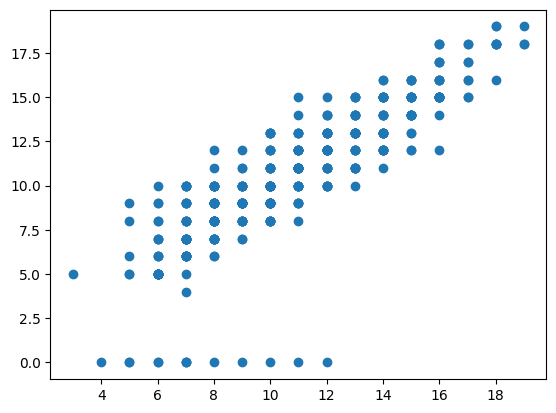

In [3]:
plt.scatter(df["grade_1"], df["grade_2"])

<Axes: xlabel='grade_1'>

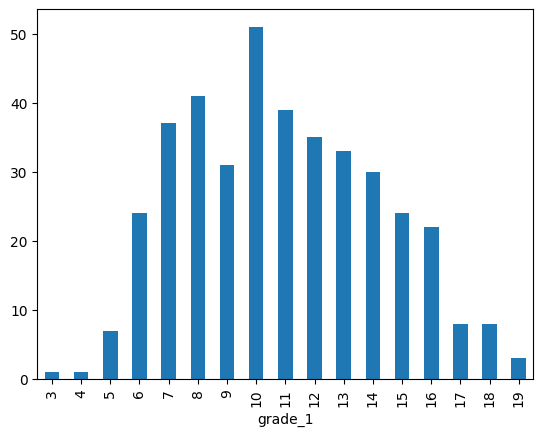

In [4]:
df["grade_1"].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

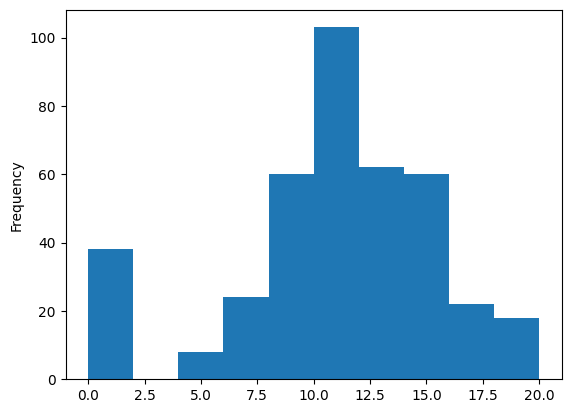

In [5]:
df["final_grade"].plot(kind="hist")

The dataset contains 395 records with no missing data. The linear regression method is used to answer the following two questions:
- predicting grade_2 based on grade_1?
- using all the attributes to predict the final grade?

In both cases, all attributes will be analyzed in order to build the best model. The original dataset is split into the training and test data, and the model is evaluated on the performance over the test data in both cases. The test data consists of 10% of all data, and is chosen randomly.

In [6]:
# check if the student_id is unique

dataset_size = len(df)
test_data_size = round(0.1*dataset_size)

test_df = df.sample(test_data_size)
test_data_ids = set(test_df["student_id"].values)
train_df = df[~df["student_id"].isin(test_data_ids)]

print("The size of the original dataset is: {}".format(dataset_size))
print("The size of the training dataset is: {}".format(len(train_df)))
print("The size of the testing dataset is: {}".format(len(test_df)))

training_data_ids = set(train_df["student_id"].values)
shared_ids = test_data_ids & training_data_ids

print("The number of shared student_ids between the training and testing datasets is: {}.".format(len(shared_ids)))

The size of the original dataset is: 395
The size of the training dataset is: 355
The size of the testing dataset is: 40
The number of shared student_ids between the training and testing datasets is: 0.


## Part #1: Predicting grade 2 based on grade 1?

How well can linear regression model predict the grade 2 score, knowing grade 1, and all 31 attributes?

Analysis of variance identity breakdown:
  - total sum of squares (SST): 5181.68,
  - regression sum of squares (SSR): 3777.71,
  - residual sum of squares (SSRes): 1403.97,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 949.83
The 0.95 quantile of the F-distribution with 1 and 353 degrees of freedom is: 3.87
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


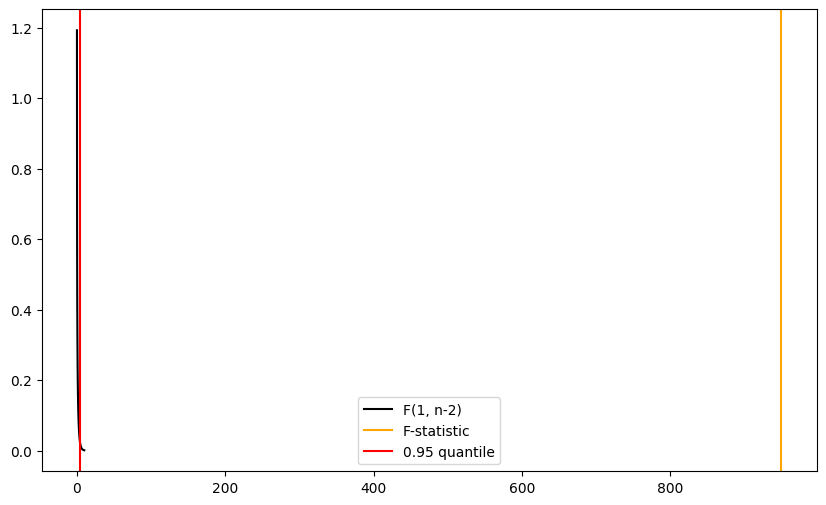

In [7]:
simple_model = lr.SimpleLinearRegression(x = train_df["grade_1"], y = train_df["grade_2"])
simple_model.analysis_of_variance()

In [8]:
r2 = simple_model.coefficient_of_determination()

print("The R2 score for the simple model of prodicting grade 2 based on grade 1 is: ", r2)

The R2 score for the simple model of prodicting grade 2 based on grade 1 is:  0.7290508677626405


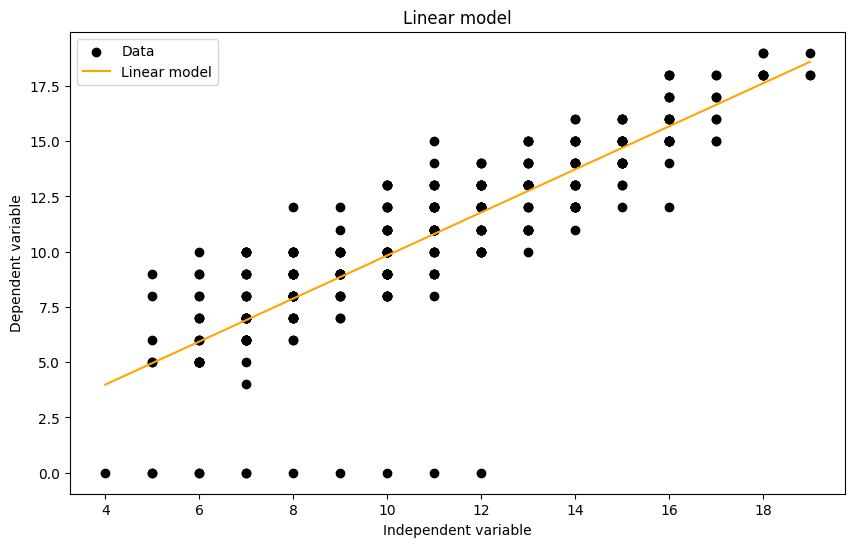

In [9]:
simple_model.plot_linear_model_line()

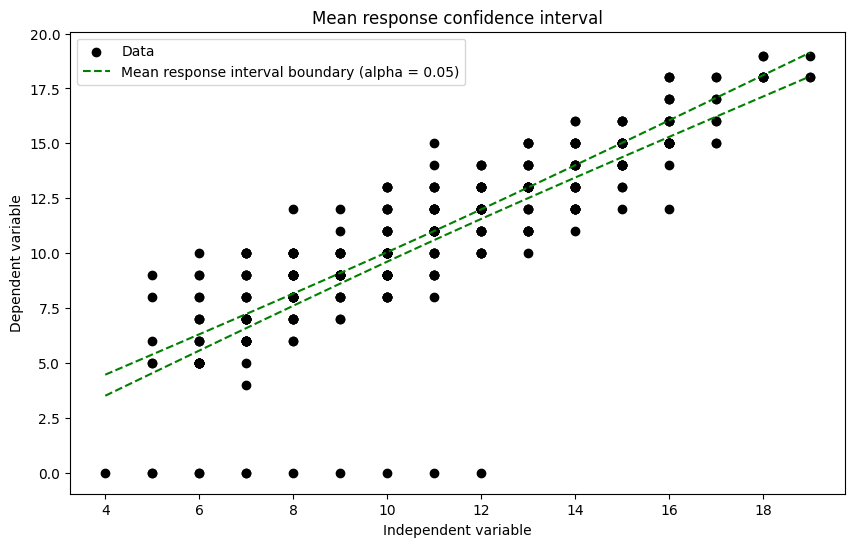

In [10]:
simple_model.plot_mean_response_confidence_area()

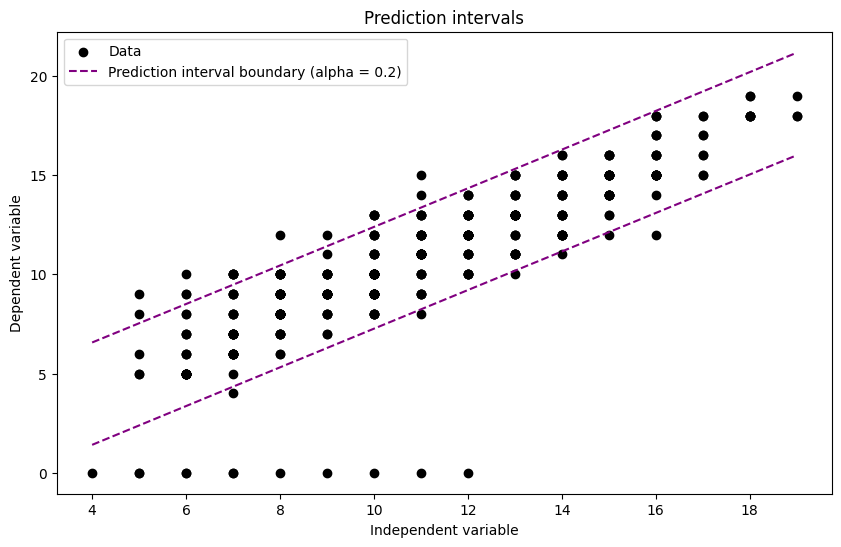

In [11]:
simple_model.plot_prediction_confidence_area(alpha = 0.2)

The simple linear model of regressing grade 2 against grade 1 explains 72% of the variability in the data. The next step is to introduce new regressors to the model, to see if they add predictive power. The is done using the contribution test on individual parameters of the multiple linear regression model, which uses the F-distribution to determine if a set of regressors adds additional predictive power. The hypothesis is $H_0: b_j = 0$, for chosen values of $j$.

We test to see how SSR changes as new feature groups are added to the model:
1. alcohol: weekday_alcohol, weekend_alcohol; these are ordinal features, in the sense that they are categorical (small set of possible values repeating often in the dataset), but they have some ordering: 1 means low, and 5 means high.
2. family: family_size, parent_status, mother_job, father_job, mother_education, father_education, family_relationship, family_support, guardian
3. demographic: school, sex, age, address_type, travel_time
4. social life: health, romantic_relationship, free_time, social
5. study habits: school_choice_reason, study_time, class_failures, absences, school_support, extra_paid_classes, internet_access, activities, nursery_school, higher_ed

In [12]:
x_data_alcohol = train_df[["grade_1", "weekday_alcohol", "weekend_alcohol"]].values
y_data_alcohol = train_df["grade_2"].values

model_alcohol = lr.MultipleLinearRegression(X = x_data_alcohol, y = y_data_alcohol)

In [13]:
print(model_alcohol)

Multiple linear regression model trained on 355 observations with 4 parameters.
The estimated parameters are: 
   - intercept: -0.1115
   - x1: 0.9766
   - x2: 0.0099
   - x3: 0.0674



In [14]:
model_alcohol.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter intercept...
   - value of t statistic:  -0.25355461166725823
   - value of t statistic boundary:  1.9667455609475144
   - H0 hypothesis b0 (intercept) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter x1...
   - value of t statistic:  30.64044934688043
   - value of t statistic boundary:  1.9667455609475144
   - H0 hypothesis b1 (x1) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter x2...
   - value of t statistic:  0.061879790687277225
   - value of t statistic boundary:  1.9667455609475144
   - H0 hypothesis b2 (x2) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter x3...
   - value of t statistic:  0.624093253

In [15]:
train_df.groupby("weekday_alcohol")["grade_2"].mean()

weekday_alcohol
1    11.008065
2     9.971429
3    10.583333
4     9.000000
5    11.714286
Name: grade_2, dtype: float64

Text(0.5, 1.0, 'Box Plot by Alcohol Consumption')

<Figure size 1000x600 with 0 Axes>

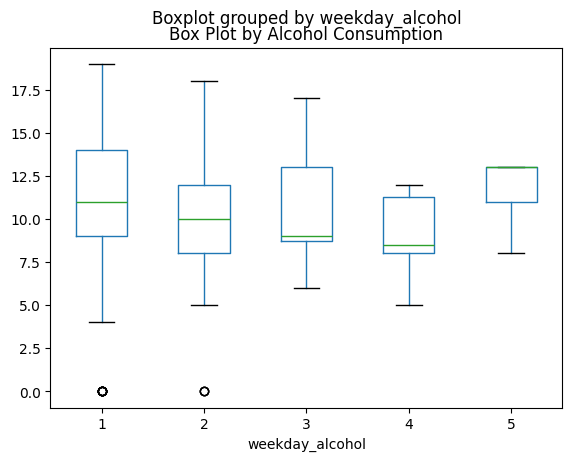

In [16]:
plt.figure(figsize=(10, 6))
train_df.boxplot(column='grade_2', by='weekday_alcohol', grid=False)
plt.title('Box Plot by Alcohol Consumption')

Text(0.5, 1.0, 'Box Plot by Alcohol Consumption')

<Figure size 1000x600 with 0 Axes>

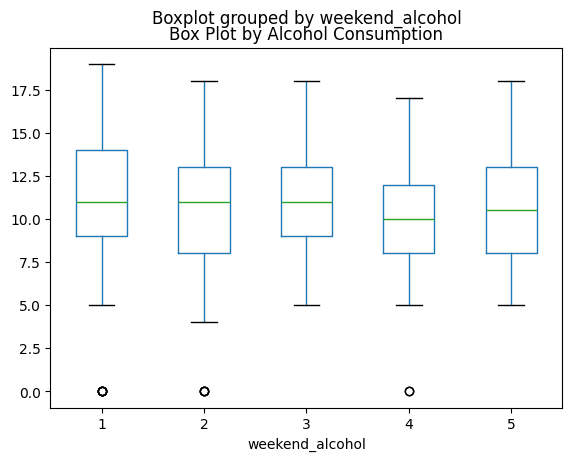

In [17]:
plt.figure(figsize=(10, 6))
train_df.boxplot(column='grade_2', by='weekend_alcohol', grid=False)
plt.title('Box Plot by Alcohol Consumption')

Testing the overall significance of the regressors with indices: [2, 3]...

H0: bi=0 for all i in [2, 3]
The residual sum of squares for the full model is: 3780.60
The residual sum of squares for the simple model is: 3777.71
The difference in residual sum of squares is: 2.89
The F statistic is: 0.36
For alpha = 0.05, the 0.95 quantile of the F distribution with 2 and 351 degrees of freedom is: 3.02
The H0 hypothesis is: NOT REJECTED


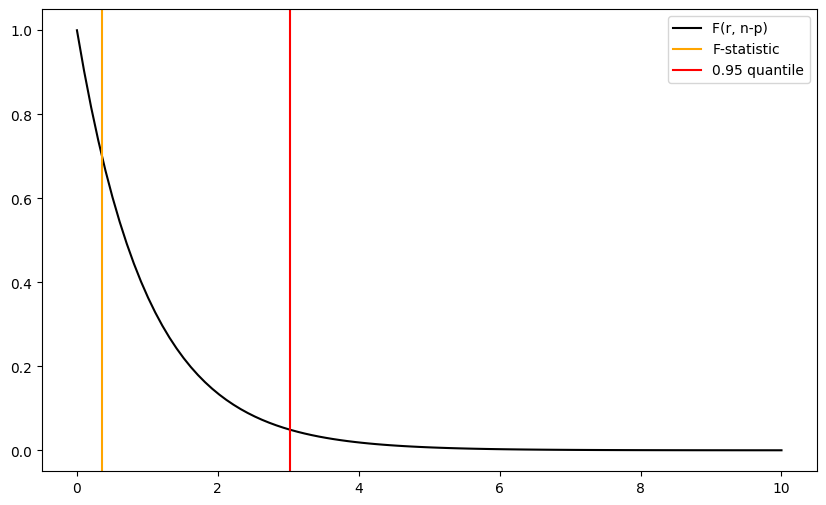

0.3622568927019525

In [18]:
model_alcohol.contribution_set_of_regressors(indices=[2, 3], verbose = True)

Overall, the hypothesis that alcohol consumption either during the weekday or weekend impacts the grade was not found to be useful in predicting the grade 2, so these variables will be excluded from further analysis.

### Social life

After alcohol, the next group of variables tested for significance to the model is the social life of the student, for which the following data is provided:
- romantic_relationship - with a romantic relationship (binary: yes or no)
- free_time - free time after school (numeric: from 1 - very low to 5 - very high)
- social - going out with friends (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)

In [19]:
temp = train_df[["grade_1", "romantic_relationship", "free_time", "social", "health"]]
temp["romantic_relationship"] = temp["romantic_relationship"].astype("category")

# use one-hot encoding to convert categorical data to numerical data
temp = pd.get_dummies(temp, columns=["romantic_relationship"], dtype=int, drop_first=True)

x_data_social = temp.values
y_data_social = train_df["grade_2"].values

model_social = lr.MultipleLinearRegression(X = x_data_social, y = y_data_social, labels=list(temp.columns))

print(model_social)

Multiple linear regression model trained on 355 observations with 6 parameters.
The estimated parameters are: 
   - intercept: 1.1144
   - grade_1: 0.9635
   - free_time: -0.0371
   - social: -0.1047
   - health: -0.0695
   - romantic_relationship_yes: -0.6753



/var/folders/6f/lfg7qvk53yv33s_dw8dt13xw0000gn/T/ipykernel_5534/3222682879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["romantic_relationship"] = temp["romantic_relationship"].astype("category")


In [20]:
model_social.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter intercept...
   - value of t statistic:  1.776066896521193
   - value of t statistic boundary:  1.9667845565746986
   - H0 hypothesis b0 (intercept) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter grade_1...
   - value of t statistic:  30.337261429744974
   - value of t statistic boundary:  1.9667845565746986
   - H0 hypothesis b1 (grade_1) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter free_time...
   - value of t statistic:  -0.33272952126830796
   - value of t statistic boundary:  1.9667845565746986
   - H0 hypothesis b2 (free_time) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter social...
   - value of

From the "social" category, only the romantic relationship seems to be relevant in predicting the grade.

### Study habits

Study habits: school_choice_reason, study_time, class_failures, absences, school_support, extra_paid_classes, internet_access, activities, nursery_school, higher_ed

In [35]:
import warnings

warnings.filterwarnings("ignore")

study_df = train_df[["grade_1", "school_choice_reason", "study_time", "class_failures", "absences", "school_support", "extra_paid_classes", "internet_access", "activities", "nursery_school", "higher_ed", "grade_2"]]

study_time_dict = {
    "<2 hours": "low",
    "2 to 5 hours": "medium",
    "5 to 10 hours": "high",
    ">10 hours": "very_high"
}

binary_encoding = {
    "no": 0,
    "yes": 1
}

study_df["study_time"] = study_df["study_time"].map(study_time_dict)
study_df["school_choice_reason"] = study_df["school_choice_reason"].astype("category")
study_df["study_time"] = study_df["study_time"].astype("category")

for att in ["school_support", "extra_paid_classes", "internet_access", "activities", "nursery_school", "higher_ed"]:
    study_df[att] = study_df[att].map(binary_encoding)

study_df = pd.get_dummies(study_df, columns=["school_choice_reason"], dtype=int, drop_first=True, prefix="reason")
study_df = pd.get_dummies(study_df, columns=["study_time"], dtype=int, drop_first=True, prefix="study_time")

x_data_study = study_df.drop("grade_2", axis=1).values
y_data_study = study_df["grade_2"].values

model_study = lr.MultipleLinearRegression(X = x_data_study, y = y_data_study, labels=list(study_df.drop("grade_2", axis=1).columns))
print(model_study)

Multiple linear regression model trained on 355 observations with 16 parameters.
The estimated parameters are: 
   - intercept: -1.0429
   - grade_1: 0.9675
   - class_failures: -0.2457
   - absences: -0.0119
   - school_support: 0.9406
   - extra_paid_classes: 0.2595
   - internet_access: 0.5358
   - activities: 0.1132
   - nursery_school: -0.0842
   - higher_ed: 0.0892
   - reason_home: 0.4989
   - reason_other: 0.7644
   - reason_reputation: 0.1581
   - study_time_low: 0.4835
   - study_time_medium: 0.3472
   - study_time_very_high: 0.6491



Analysis of variance identity breakdown:
  - total sum of squares (SST): 5181.68,
  - regression sum of squares (SSR): 3883.26,
  - residual sum of squares (SSRes): 1298.42,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 67.59
The 0.95 quantile of the F-distribution with 15 and 339 degrees of freedom is: 1.70
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


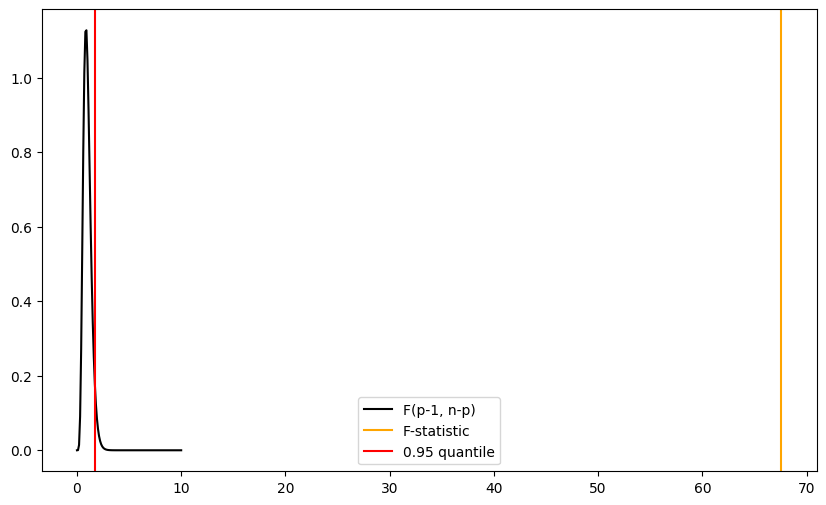

In [36]:
model_study.analysis_of_variance()

In [38]:
model_study.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter intercept...
   - value of t statistic:  -1.3860558297785914
   - value of t statistic boundary:  1.9669864608402783
   - H0 hypothesis b0 (intercept) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter grade_1...
   - value of t statistic:  27.538134375417656
   - value of t statistic boundary:  1.9669864608402783
   - H0 hypothesis b1 (grade_1) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter class_failures...
   - value of t statistic:  -1.5598939348164562
   - value of t statistic boundary:  1.9669864608402783
   - H0 hypothesis b2 (class_failures) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter absences...


### Demographic

3. demographic: school, sex, age, address_type, travel_time

In [45]:
df_demographic = train_df[["grade_1", "grade_2", "school", "sex", "age", "address_type", "travel_time"]]

travel_time_dict = {
    "<15 min.": "low",
    "15 to 30 min.": "medium",
    "30 min. to 1 hour": "high",
    ">1 hour": "very_high"
}

df_demographic["travel_time"] = df_demographic["travel_time"].map(travel_time_dict)

for att in ["school", "sex", "address_type", "travel_time"]:
    df_demographic[att] = df_demographic[att].astype("category")
    df_demographic = pd.get_dummies(df_demographic, columns=[att], dtype=int, drop_first=True, prefix=att)

df_demographic.head()

,grade_1,grade_2,age,school_MS,sex_M,address_type_Urban,travel_time_low,travel_time_medium,travel_time_very_high
0,5,6,18,0,0,1,0,1,0
1,5,5,17,0,0,1,1,0,0
2,7,8,15,0,0,1,1,0,0
3,15,14,15,0,0,1,1,0,0
4,6,10,16,0,0,1,1,0,0


In [46]:
x_data_demographic = df_demographic.drop("grade_2", axis=1).values
y_data_demographic = df_demographic["grade_2"].values

model_demographic = lr.MultipleLinearRegression(X = x_data_demographic, y = y_data_demographic, labels=list(df_demographic.drop("grade_2", axis=1).columns))

print(model_demographic)

Multiple linear regression model trained on 355 observations with 9 parameters.
The estimated parameters are: 
   - intercept: 2.8451
   - grade_1: 0.9575
   - age: -0.2346
   - school_MS: 0.3716
   - sex_M: 0.0923
   - address_type_Urban: 0.4279
   - travel_time_low: 1.0590
   - travel_time_medium: 0.8093
   - travel_time_very_high: 0.4111



In [47]:
model_demographic.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter intercept...
   - value of t statistic:  1.7719715093402593
   - value of t statistic boundary:  1.9668438982059417
   - H0 hypothesis b0 (intercept) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter grade_1...
   - value of t statistic:  30.302703251772737
   - value of t statistic boundary:  1.9668438982059417
   - H0 hypothesis b1 (grade_1) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter age...
   - value of t statistic:  -2.6336855712335963
   - value of t statistic boundary:  1.9668438982059417
   - H0 hypothesis b2 (age) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter school_MS...
   - value of t statistic:

### Family status

family: family_size, parent_status, mother_job, father_job, mother_education, father_education, family_relationship, family_support, guardian

In [55]:
df_family = train_df[["grade_1", "grade_2", "family_size", "parent_status", "mother_education", "father_education", "mother_job", "father_job", "family_support", "family_relationship", "guardian"]]

categorical_attributes = ["parent_status", "father_education", "mother_education", "family_size", "mother_job", "father_job", "family_support", "guardian"]

for att in categorical_attributes:
    df_family[att] = df_family[att].astype("category")
    df_family = pd.get_dummies(df_family, columns=[att], dtype=int, drop_first=True, prefix=att)

x_data_family = df_family.drop("grade_2", axis=1).values
y_data_family = df_family["grade_2"].values

model_family = lr.MultipleLinearRegression(X = x_data_family, y = y_data_family, labels=list(df_family.drop("grade_2", axis=1).columns))

print(model_family)

Multiple linear regression model trained on 355 observations with 24 parameters.
The estimated parameters are: 
   - intercept: 0.0693
   - grade_1: 0.9734
   - family_relationship: -0.1703
   - parent_status_Living together: -0.3329
   - father_education_higher education: -0.2817
   - father_education_none: 1.3287
   - father_education_primary education (4th grade): 0.0028
   - father_education_secondary education: 0.1211
   - mother_education_higher education: 0.5066
   - mother_education_none: 2.1223
   - mother_education_primary education (4th grade): -0.3629
   - mother_education_secondary education: -0.0917
   - family_size_Less than or equal to 3: 0.0945
   - mother_job_health: 0.1848
   - mother_job_other: 0.5039
   - mother_job_services: 0.4132
   - mother_job_teacher: -0.1712
   - father_job_health: 1.1157
   - father_job_other: 0.9033
   - father_job_services: 1.2487
   - father_job_teacher: 0.1533
   - family_support_yes: 0.0121
   - guardian_mother: -0.2974
   - guardian_o

In [56]:
model_family.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter intercept...
   - value of t statistic:  0.07633959124385273
   - value of t statistic boundary:  1.9671567996106818
   - H0 hypothesis b0 (intercept) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter grade_1...
   - value of t statistic:  29.02142905096517
   - value of t statistic boundary:  1.9671567996106818
   - H0 hypothesis b1 (grade_1) = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter family_relationship...
   - value of t statistic:  -1.4456811235089833
   - value of t statistic boundary:  1.9671567996106818
   - H0 hypothesis b2 (family_relationship) = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter par

In [57]:
x_data_full = train_df.drop("grade_2", axis=1).values
y_data_full = train_df["grade_2"].values

model_full = lr.MultipleLinearRegression(X = x_data_full, y = y_data_full, labels=list(train_df.drop("grade_2", axis=1).columns))

print(model_full)

TypeError: can't multiply sequence by non-int of type 'float'

# Preprocessing




In [59]:
math_exam_df = pd.read_csv("datasets/student_performance/student_math_clean.csv")
math_exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             395 non-null    int64 
 1   school                 395 non-null    object
 2   sex                    395 non-null    object
 3   age                    395 non-null    int64 
 4   address_type           395 non-null    object
 5   family_size            395 non-null    object
 6   parent_status          395 non-null    object
 7   mother_education       395 non-null    object
 8   father_education       395 non-null    object
 9   mother_job             395 non-null    object
 10  father_job             395 non-null    object
 11  school_choice_reason   395 non-null    object
 12  guardian               395 non-null    object
 13  travel_time            395 non-null    object
 14  study_time             395 non-null    object
 15  class_failures         

In [60]:
math_exam_df["romantic_relationship"].value_counts()

romantic_relationship
no     263
yes    132
Name: count, dtype: int64

In [61]:
student_in_relationships = math_exam_df[math_exam_df["romantic_relationship"] == "yes"]
student_not_in_relationships = math_exam_df[math_exam_df["romantic_relationship"] == "no"]

simple_model_rel = lr.SimpleLinearRegression(x = student_in_relationships["grade_1"], y = student_in_relationships["grade_2"])
simple_model_no_rel = lr.SimpleLinearRegression(x = student_not_in_relationships["grade_1"], y = student_not_in_relationships["grade_2"])
simple_model = lr.SimpleLinearRegression(x = math_exam_df["grade_1"], y = math_exam_df["grade_2"])

print("SSR for the full model: ", simple_model.SSR)
print("SSR for the model of students in relationships: ", simple_model_rel.SSR)
print("SSR for the model of students not in relationships: ", simple_model_no_rel.SSR, end="\n\n")

print("R2 score for the full model: ", simple_model.coefficient_of_determination())
print("R2 score for the model of students in relationships: ", simple_model_rel.coefficient_of_determination())
print("R2 score for the model of students not in relationships: ", simple_model_no_rel.coefficient_of_determination())

SSR for the full model:  4047.799351475709
SSR for the model of students in relationships:  1222.889925000004
SSR for the model of students not in relationships:  2792.4112726440135

R2 score for the full model:  0.7261051990252958
R2 score for the model of students in relationships:  0.6271035480637763
R2 score for the model of students not in relationships:  0.7854959642008561
